In [2]:
# Importing libraries-

import pandas as pd # mathematical ops
import numpy as np #dataframe manipulation
import seaborn as sns # data visualization lab
import matplotlib.pyplot as plt # oldest data visualization lab
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# Importing the data frame-

data=pd.read_csv('emp_health.csv')

# Reading some rows of dataset
display(data.head())
print()

# Learn data types of all features
print(data.info())
print()

# See the statistical properties of the data
print(data.describe())


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB
None

               age          bmi    dependent   expenditure
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%     

In [369]:
# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

a=data[data['age']>50]

print('Employees who are above 50 age and are smoking: ',a['age'].count())

print('Average expenditure on health management: ',a['expenditure'].mean())


Employees who are above 50 age and are smoking:  356
Average expenditure on health management:  18084.98722294943


In [370]:
# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

a=data[data['sex']=='female']
b=a[a['alcohol']!='no']['alcohol'].count()

print('Female employees who did not consume alcohol daily: ',b)
c=a['sex'].count()/b
print("Proportion of female who d'not consume alcohol daily with respect to total female employees: ",(round(c,3)))

Female employees who did not consume alcohol daily:  550
Proportion of female who d'not consume alcohol daily with respect to total female employees:  1.204


In [373]:
# 3. Display zone wise average expenditure of employees on health

a=pd.pivot_table(data,index=['zone'],values=['expenditure'],aggfunc=np.mean)
print('Zone wise average expenditure of employees on health: ')
a

Zone wise average expenditure of employees on health: 


,expenditure
zone,
east,13774.679941
north,14102.583403
northeast,13694.721724
northwest,12151.702619
south,14715.689519
southeast,14452.949680
southwest,12717.083869
west,12182.998872


In [375]:
# 4. Employees of which zone did maximum expenditure on health

print(data[data['expenditure']==(data['expenditure']).max()]['zone'])

print('Employees of southeast zone did maximum expenditure on health')

543    southeast
Name: zone, dtype: object
Employees of southeast zone did maximum expenditure on health


In [376]:
# 5. What is the minimum expenditure done by any employee in organization

print(data[data['expenditure']==(data['expenditure']).min()]['expenditure'])

print('Minimum expenditure done by any employee in organization is 1121.8739')

940    1121.8739
Name: expenditure, dtype: float64
Minimum expenditure done by any employee in organization is 1121.8739


In [381]:
# 6. What is average expenditure of employees who have 2 or lesser dependents.

a=data[data['dependent']<=2]['expenditure'].mean()

print('Average expenditure of employees who have 2 or lesser dependents is: ',a)

Average expenditure of employees who have 2 or lesser dependents is:  13040.970970948145


In [382]:
# 7. How many employees are below age of 20 years. What is their average BMI

print('No. of employee above age of 20 years: ',(data[data['age']<20]['age'].count()))
print()
print('Average BMI of 137 employee:',data[data['age']<20]['bmi'].mean())

No. of employee above age of 20 years:  137

Average BMI of 137 employee: 29.971496350364966


In [383]:
# 8. Create a dataframe "non_smoker" for all non-smoker male employees

non_smoker=data[(data['smoke']=='no') & (data['sex']=='male')]
non_smoker.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070


In [384]:
#  9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

non_alcoholic=data[(data['alcohol']=='no') & (data['sex']=='male')]
non_alcoholic.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630


In [385]:
# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. 
#The dataframe should contain columns- id, smoke, alcohol

non_smoking_alcoholic=pd.merge(non_smoker,non_alcoholic,on=['id','smoke','alcohol'],how='inner')

df=non_smoking_alcoholic[['id','smoke','alcohol']]
df

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


In [386]:
 # 11. What is the count for each zone with respect to number of dependent
    
pd.crosstab(data.zone,data.dependent)

dependent,0,1,2,3,4,5
zone,,,,,,
east,124,65,42,22,6,3
north,26,20,10,12,1,1
northeast,35,9,15,13,2,0
northwest,70,28,30,13,4,0
south,38,21,12,12,1,0
southeast,81,57,38,15,2,5
southwest,116,53,44,25,6,7
west,84,71,49,45,3,2


In [387]:
# 12. Classify the employees into 3 categories.

In [388]:
# Category 1 : employees below 18.5 bmi - underweight

a=data.loc[data['bmi']<18.5]
a['category']='underweight'
a.head(10)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215,underweight
128,i10140,32,female,17.765,2,weekend,yes,northwest,32734.18630,underweight
172,i10184,18,male,15.960,0,party,no,north,1694.79640,underweight
198,i10210,51,female,18.050,0,weekend,no,northwest,9644.25250,underweight
232,i10244,19,female,17.800,0,party,no,southwest,1727.78500,underweight
250,i10262,18,male,17.290,2,party,yes,north,12829.45510,underweight
380,i10392,27,female,17.955,2,party,yes,east,15006.57945,underweight
410,i10422,19,male,17.480,0,weekend,no,west,1621.34020,underweight
412,i10424,26,female,17.195,2,no,yes,east,14455.64405,underweight
428,i10440,21,female,16.815,1,daily,no,east,3167.45585,underweight


In [389]:
#  Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit

b=data.loc[(data['bmi']>18.5) & (data['bmi']<24.9)]
b['category']='fit'
b.head(10)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
15,i10027,19,male,24.600,1,party,no,southwest,1837.23700,fit
17,i10029,23,male,23.845,0,weekend,no,north,2395.17155,fit
26,i10038,63,female,23.085,0,weekend,no,north,14451.83515,fit
35,i10047,19,male,20.425,0,party,no,northwest,1625.43375,fit
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000,fit
42,i10054,41,male,21.780,1,weekend,no,south,6272.47720,fit
48,i10060,60,female,24.530,0,daily,no,south,12629.89670,fit
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020,fit
62,i10074,64,male,24.700,1,weekend,no,northwest,30166.61817,fit


In [390]:
# Category 3 : employee with bmi over 24.9 - overweight

c=data.loc[data['bmi']>24.9]
c['category']='overweight'
c.head(10)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.92400,overweight
1,i10013,18,male,33.77,1,weekend,no,south,1725.55230,overweight
2,i10014,28,male,33.00,3,rarely,no,south,4449.46200,overweight
4,i10016,32,male,28.88,0,party,no,northwest,3866.85520,overweight
5,i10017,31,female,25.74,0,no,no,south,3756.62160,overweight
6,i10018,46,female,33.44,1,daily,no,south,8240.58960,overweight
7,i10019,37,female,27.74,3,weekend,no,northwest,7281.50560,overweight
8,i10020,37,male,29.83,2,party,no,north,6406.41070,overweight
9,i10021,60,female,25.84,0,no,no,northwest,28923.13692,overweight
10,i10022,25,male,26.22,0,daily,no,north,2721.32080,overweight


In [391]:
# What is the average expenditure of employees in each category.

data_new=pd.concat([a,b],axis=0)
data_new1=pd.concat([data_new,c],axis=0)
data_new1.sort_values('id',ascending=True)

pd.pivot_table(data_new1,index=['category'],values=['expenditure'],aggfunc=np.mean)

,expenditure
category,
fit,10404.900084
overweight,13936.616823
underweight,8852.200585


<AxesSubplot:xlabel='category', ylabel='expenditure'>

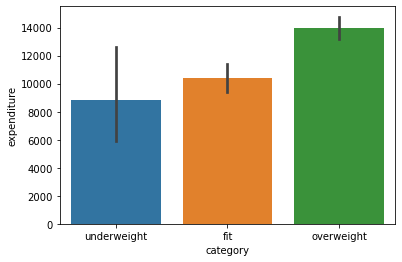

In [392]:
# Display the bar chart for the same

sns.barplot(x='category',y='expenditure',data=data_new1)

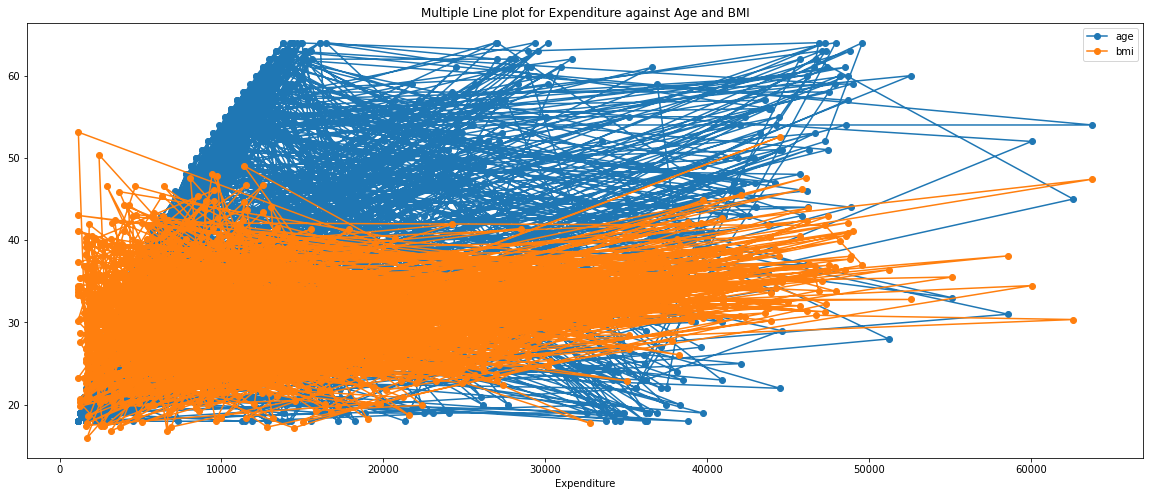

In [393]:
# 13. Draw line plot of expenditure against age and BMI


plt.figure(figsize=(20,8))
plt.plot('expenditure','age',data=data,marker='o')
plt.plot('expenditure','bmi',data=data,marker='o')

plt.title('Multiple Line plot for Expenditure against Age and BMI')
plt.xlabel('Expenditure')
plt.legend()
plt.show()

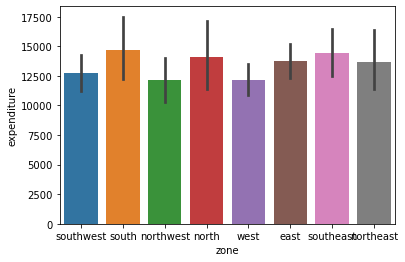

In [396]:
# 14. Draw a bar chart to show zone wise average expenditure

sns.barplot(x='zone',y='expenditure',data=data);

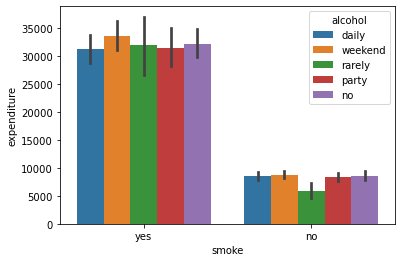

In [398]:
# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

sns.barplot(x='smoke',y='expenditure',data=data,hue='alcohol');

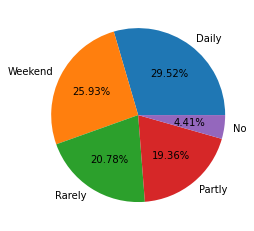

In [399]:
# 16. Draw pie chart for alcohol consumption habits

plt.pie(data.alcohol.value_counts(),labels=['Daily','Weekend','Rarely','Partly','No'],autopct="%0.2f%%");

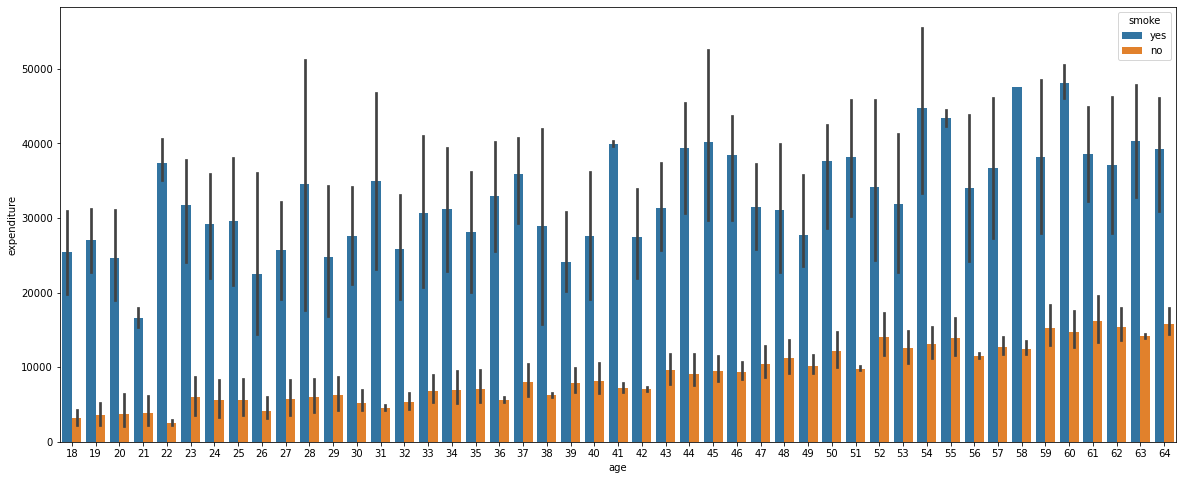

In [400]:
# 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue
plt.figure(figsize=(20,8))
sns.barplot(x='age',y='expenditure',data=data,hue='smoke');

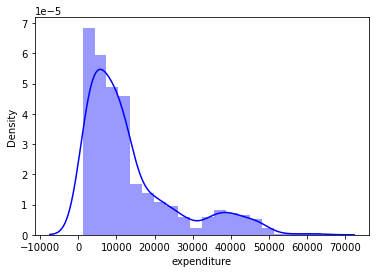

In [401]:
# 18. Draw distribution plot of expenditure

sns.distplot(data['expenditure'],bins=20,color='b');

<Figure size 1080x576 with 0 Axes>

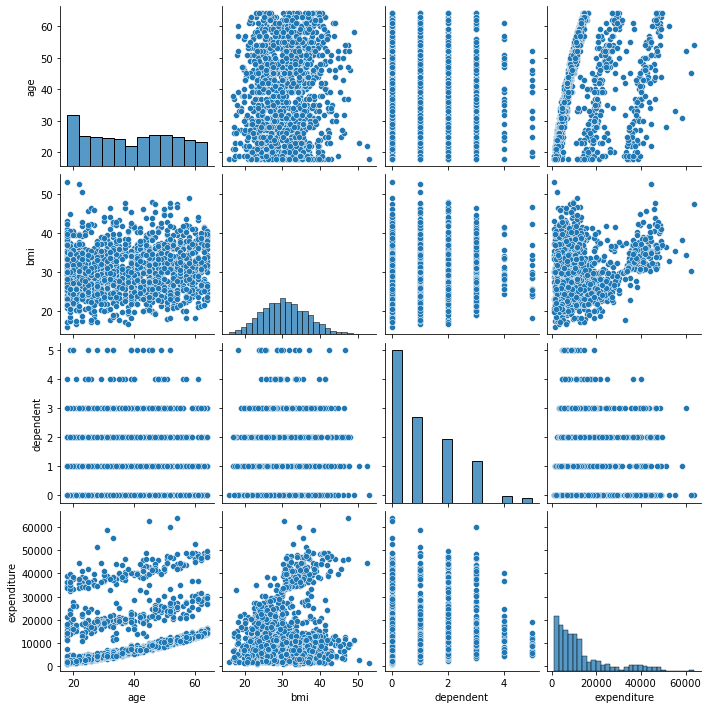

In [402]:
#  19. Display the pairplot

plt.figure(figsize = (15,8))
sns.pairplot(data);
plt.show()

                  age       bmi  dependent  expenditure
age          1.000000  0.109272   0.042469     0.299008
bmi          0.109272  1.000000   0.012759     0.198341
dependent    0.042469  0.012759   1.000000     0.067998
expenditure  0.299008  0.198341   0.067998     1.000000


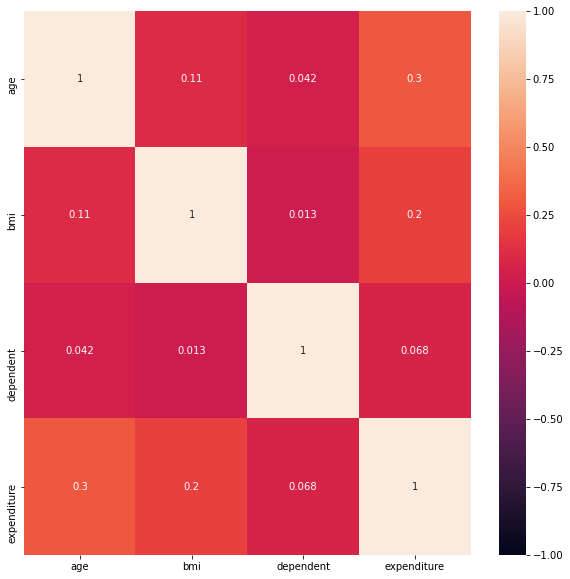

In [354]:
# 20. Display heatmap for the data

corr_data=data.corr()
print(corr_data)
plt.figure(figsize = (10,10))
sns.heatmap(corr_data, annot = True, vmin = -1)
plt.show()

In [405]:
data.head(50)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
6,i10018,46,female,33.440,1,daily,no,south,8240.58960
7,i10019,37,female,27.740,3,weekend,no,northwest,7281.50560
8,i10020,37,male,29.830,2,party,no,north,6406.41070
9,i10021,60,female,25.840,0,no,no,northwest,28923.13692
